# Neural Networks Assignment
## Gas Turbines data
predicting turbine energy yield (TEY) using ambient variables as features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor

2023-05-09 15:08:43.671384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('gas_turbines.csv')

### Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

| Variable (Abbr.)                    | Unit | Min    | Max    | Mean   |
|-------------------------------------|------|--------|--------|--------|
| Ambient temperature (AT)            | C    | 6.23   | 37.10  | 17.71  |
|Ambient pressure (AP)                | mbar | 985.85 | 1036.56| 1013.07|
|Ambient humidity (AH)                | (%)  | 24.08  | 100.20 | 77.87  |
|Air filter difference pressure (AFDP)| mbar | 2.09   | 7.61   | 3.93   |
|Gas turbine exhaust pressure (GTEP)  | mbar | 17.70  | 40.72  | 25.56  |
|Turbine inlet temperature (TIT)      | C    | 1000.85| 1100.89| 1081.43|
|Turbine after temperature (TAT)      | C    | 511.04 | 550.61 | 546.16 |
|Compressor discharge pressure (CDP)  | mbar | 9.85   | 15.16  | 12.06  |
|Turbine energy yield (TEY)           | MWH  | 100.02 | 179.50 | 133.51 |
|Carbon monoxide (CO)                 | mg/m3| 0.00   | 44.10  | 2.37   |
|Nitrogen oxides (NOx)                | mg/m3| 25.90  | 119.91 | 65.29  |


In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
data.duplicated().sum()

0

### Data Visualization

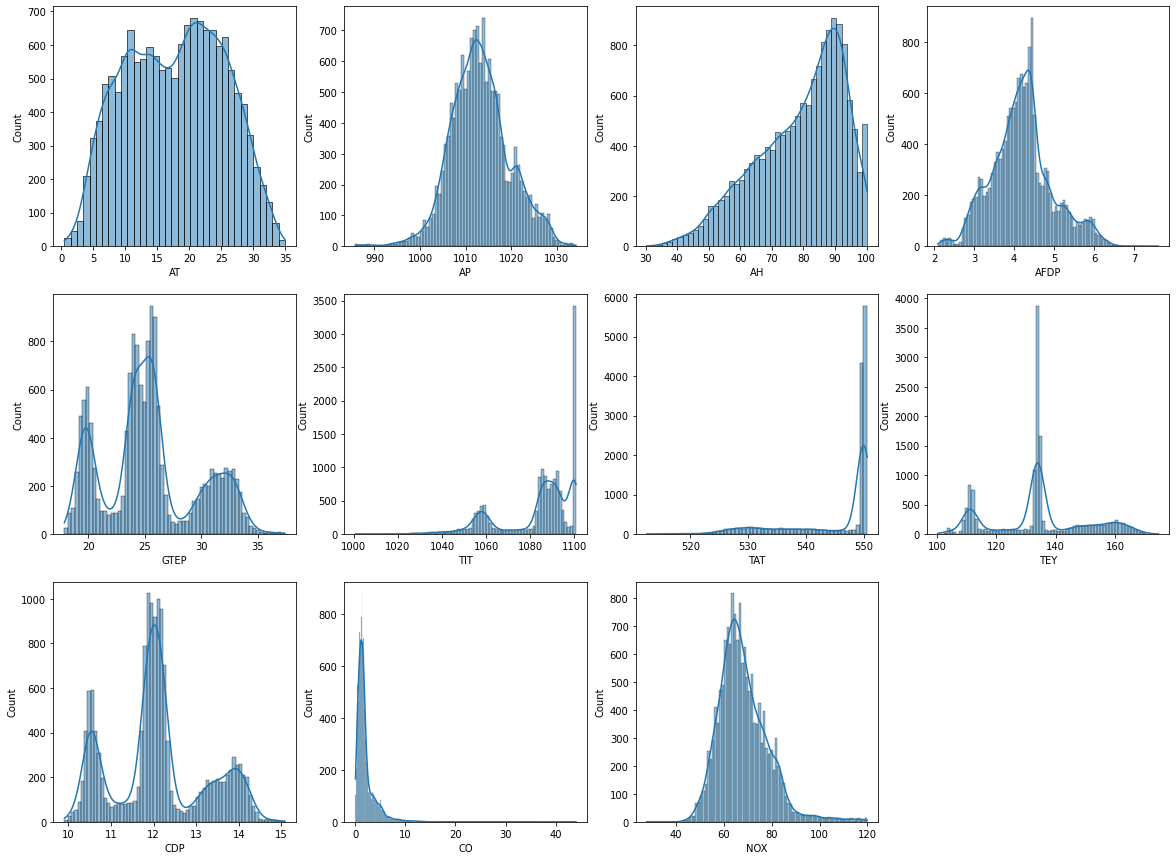

In [6]:
plt.figure(figsize=(20,15))
for i in range(len(data.columns)):
    plt.subplot(3,4,i+1)
    sns.histplot(data=data, x=data.columns[i], kde=True)

### Preparing data for model

In [7]:
x = data.drop('TEY', axis=1)
y = data['TEY']

In [8]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x.shape

(15039, 10)

### Model Building

In [11]:
def create_model(units=20, optimizer='adam', activation='relu', dropout_rate=0.0, num_layers=1):
    model = Sequential()
    model.add(Dense(units, input_dim=10, activation=activation))
    model.add(Dropout(dropout_rate))
    
    for i in range(num_layers):
        model.add(Dense(units, activation=activation))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

### GridSearchCV

parameters
- units for hidden layers
- optimizers
- activation function
- dropout rate
- number of hidden layers

In [12]:
param_grid = {
    'units': [8, 16, 32],
    'optimizer': ['adam', 'sgd'],
    'activation': ['relu', 'sigmoid'],
    'dropout_rate': [0.0, 0.1, 0.2],
    'num_layers': [1, 2, 3]
}

In [13]:
model = KerasRegressor(model=create_model, verbose=0, activation='relu', dropout_rate=0.0, num_layers=1, units=8)

In [14]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV 1/5; 1/108] START activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8
[CV 1/5; 1/108] END activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8;, score=-31.489 total time=   2.9s
[CV 2/5; 1/108] START activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8
[CV 2/5; 1/108] END activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8;, score=-115.122 total time=   1.3s
[CV 3/5; 1/108] START activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8
[CV 3/5; 1/108] END activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8;, score=-36.823 total time=   1.3s
[CV 4/5; 1/108] START activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8
[CV 4/5; 1/108] END activation=relu, dropout_rate=0.0, num_layers=1, optimizer=adam, units=8;, score=-61.741 total time=   1.3s
[CV 5/5; 1/108] START activation=relu, dropo

In [15]:
print('Best: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best: -0.33577756086116295, using {'activation': 'relu', 'dropout_rate': 0.0, 'num_layers': 3, 'optimizer': 'adam', 'units': 32}


Building model using best parameters from previous gridsearch

In [19]:
build_model = KerasRegressor(model=create_model, verbose=0, activation='relu', dropout_rate=0.0, num_layers=3, units=32, optimizer='adam')

Gridsearch for other parameters:
- batch_size
- epochs

In [20]:
param_grid = {'batch_size':[500,1000,5000],
              'epochs':[30,40,50,60]}

In [21]:
grid = GridSearchCV(estimator=build_model, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=500, epochs=30..................................
[CV 1/5; 1/12] END ...batch_size=500, epochs=30;, score=0.700 total time=   3.3s
[CV 2/5; 1/12] START batch_size=500, epochs=30..................................
[CV 2/5; 1/12] END ...batch_size=500, epochs=30;, score=0.732 total time=   2.7s
[CV 3/5; 1/12] START batch_size=500, epochs=30..................................
[CV 3/5; 1/12] END ...batch_size=500, epochs=30;, score=0.704 total time=   2.8s
[CV 4/5; 1/12] START batch_size=500, epochs=30..................................
[CV 4/5; 1/12] END ...batch_size=500, epochs=30;, score=0.668 total time=   2.5s
[CV 5/5; 1/12] START batch_size=500, epochs=30..................................
[CV 5/5; 1/12] END ...batch_size=500, epochs=30;, score=0.775 total time=   2.5s
[CV 1/5; 2/12] START batch_size=500, epochs=40..................................
[CV 1/5; 2/12] END ...batch_size=500, epochs=40;

In [22]:
print('Best: {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))

Best: 0.9284028144940937, using {'batch_size': 500, 'epochs': 50}


<AxesSubplot:xlabel='param_epochs', ylabel='param_batch_size'>

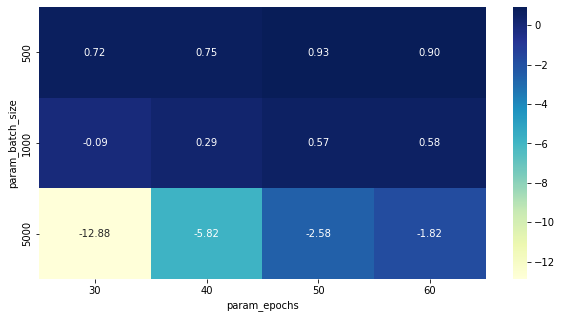

In [23]:
plt.figure(figsize=(10,5))
grid_result_df = pd.DataFrame(grid_result.cv_results_)
mean_scores = grid_result_df.pivot_table(values='mean_test_score', index='param_batch_size', columns='param_epochs')
sns.heatmap(mean_scores, cmap="YlGnBu", annot=True, fmt=".2f")

Text(0, 0.5, 'Loss')

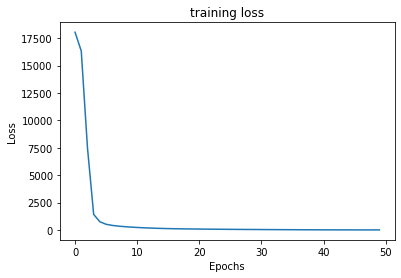

In [24]:
best_model = grid.best_estimator_
history = best_model.history_

plt.plot(history['loss'])
plt.title('training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### Creating final model using best parameters we found

In [25]:
model = create_model(activation='relu',dropout_rate=0.0, num_layers=3,optimizer='adam',units=32)
history = model.fit(x_train,y_train,epochs=50,batch_size=500)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 18145.0527
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 17075.8145
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 12525.6924
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 4088.4758
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 1645.7932
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 928.9557
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 609.8049
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 465.4378
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 395.7574
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 350.5471
Epoch 11/50
25/25 [==============================] - 0s 3ms/step - loss: 314.7664
Epoch 12/50
25/25 [==============================] - 0s 3ms/step - loss: 284.0903
Epoch 13/50
25/25

In [26]:
y_pred = model.predict(x_test)

94/94 [==============================] - 0s 1ms/step


Mean Squared Error

In [28]:
mean_squared_error(y_pred,y_test)

16.565620710070103